In [ ]:
#@title Do you want to run the code from scratch? If no, skip running this code

import numpy as np
import matplotlib.pyplot as plt
import sys
from collections import Counter
np.set_printoptions(threshold=sys.maxsize)

np.random.seed(1)
def generate_rule(rule_number):
    rule = np.zeros(8, dtype=int)
    binary = np.binary_repr(rule_number, width=8)
    for i in range(8):
        rule[i] = int(binary[i])
    return rule

def apply_rule(rule, neighborhood):
    decimal = np.sum(neighborhood * np.array([1, 2, 4]))
    return rule[7 - decimal]

def simulate(rule_number, num_iterations, num_cells, initial_percentage):
    np.random.seed(1)
    rule = generate_rule(rule_number)
    initial_state = np.zeros(num_cells, dtype=int)
    num_initial_cells = int(num_cells * initial_percentage / 100)
    initial_indices = np.random.choice(num_cells, num_initial_cells, replace=False)
    initial_state[initial_indices] = 1

    state = np.zeros((num_iterations, num_cells), dtype=int)
    state[0] = initial_state

    for i in range(1, num_iterations):
        for j in range(num_cells):
            neighborhood = state[i - 1, (j - 1) % num_cells], state[i - 1, j], state[i - 1, (j + 1) % num_cells]
            state[i, j] = apply_rule(rule, neighborhood)

    return state



def blockshaped(arr, n):
    assert len(arr) % n == 0, f"Length of array is not evenly divisible by {n}"
    return arr.reshape(-1, n)

def process_FHCG(state,rule_number,initial_percentage,th):
  time_steps,height = state.shape
  supercells_list = []
  new_grid_supercells = []
  # lower = 0.01
  # upper = 0.10
  # n = 10
  # range_size = (upper - lower) / n
  # boundaries = [lower + i * range_size for i in range(n+1)]
  # parts = []
  # for i in range(n):
  #   parts.append(boundaries[i])
  threshold = th
  block_size = 2
  for array in state:
    blocked_chunks = blockshaped(array,block_size)
    for each_chunk in blocked_chunks:
      supercells_list.append(list(each_chunk.flatten()))
  test_array = np.array(supercells_list)
  # print(test_array.shape)
  for i in range(len(supercells_list)):
    count = 0
    for j in range(len(supercells_list)):
      if(supercells_list[i]==supercells_list[j]):
        count = count+1 # count is number of blocks matching in the same grid (ref literature)
    new_grid_supercells.append(count/len(supercells_list))
  # print(new_grid_supercells)



  a = supercells_list
  total = len(a) # calculate the total number of nested lists in the parent list
  freq = Counter(map(tuple, a)) # count the frequency of each unique nested list in the parent list

  # calculate the probability of each unique nested list
  prob = {k: v / total for k, v in freq.items()}
  sorted_prob = dict(sorted(prob.items(), key=lambda x: x[0]))
  # print("debugging xmin: ",range(len(prob))[0])
  # print("debugging xmax: ",range(len(prob))[-1])
  # create a histogram plot of the probabilities
  plt.bar(range(len(sorted_prob)), list(sorted_prob.values()))
  plt.xticks(range(len(sorted_prob)), [int(''.join(map(str, k)), 2) for k in sorted_prob.keys()])
  plt.xlabel('Decimal Values of the binary values in block')
  plt.ylabel('Probability of the occurence')
  plt.title('Probability of occurence of supercells vs (Decimal Values)')

  # set y-axis tick locations and labels
  plt.yticks([i/20 for i in range(21)], [f'{i/20:.2f}' for i in range(21)])
  plt.ylim(0, 0.90)
  plt.hlines(threshold, xmin=range(len(sorted_prob))[0], xmax=range(len(sorted_prob))[-1], colors='r', linestyles='dashed') # drawing straight line for threshold
  # plt.hlines(lower,xmin=range(len(prob))[0],xmax=range(len(prob))[-1], colors='r', linestyles='dashed') # drawing straight line for threshold
  # plt.show()
  plt.savefig("histogram_{}_init_{}_threshold_{}.jpg".format(rule_number,initial_percentage,th))
  plt.close()
  # ################################################################
  # dynamic_states = list(np.linspace(1,0,n)).reverse()
  # for k in range(len(new_grid_supercells)):
  #   for z in range(len(thresholds)-1,0,-1):
  #     if(thresholds[z]<=new_grid_supercells[k]<=thresholds[z-1]):
  #       new_grid_supercells[k]=dynamic_states[z]
  # ################################################################

  # Simplify the threshold check
  for k in range(len(new_grid_supercells)):
      if new_grid_supercells[k] <= threshold:
          new_grid_supercells[k] = 1
      else:
          new_grid_supercells[k] = 0
  modified_board = np.array(new_grid_supercells)
  shape = int(height/block_size)
  # print(shape)
  modified_automaton = modified_board.reshape(time_steps,shape)
  return modified_automaton



def visualize(rule_number, num_iterations, num_cells, initial_percentage,th):
    state = simulate(rule_number, num_iterations, num_cells, initial_percentage)
    state_cg = process_FHCG(state,rule_number,initial_percentage,th)
    fig, ax = plt.subplots()
    ax.imshow(state, cmap='Greys', interpolation='nearest')
    # ax.set_xticks([])
    # ax.set_yticks([])
    plt.savefig(f'rule_{rule_number}_init_{initial_percentage}_threshold{th}.png')
    plt.close()
    plt.imshow(state_cg, cmap='Greys', interpolation='nearest')
    plt.savefig(f'cg_rule_{rule_number}_init_{initial_percentage}_threshold{th}.png')
    plt.close()

# Parameters
num_cells = 100
num_iterations = 100
# initial_percentages = [10, 20, 30, 40, 50]  # Add more percentages if desired
# 20, 30, 40, 50

# use this for main run
initial_percentages = [1, 10, 20, 30, 40, 50]  # Add more percentages if desired

# use this for main run
thresholds = [0.01,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.30,0.33,0.36,0.39,0.42,0.45,0.48,0.51,0.54,0.57,0.60,0.63,0.66,0.69,0.72,0.75]


# Simulate and visualize all possible 1D cellular automata rules with random initialization percentages
for rule_number in range(0,256):
    for initial_percentage in initial_percentages:
      for th in thresholds:
        visualize(rule_number, num_iterations, num_cells, initial_percentage,th)


In [ ]:
#@title !!! Run from here If you have chosen not to run previous code section, then just run this cell to download the dataset of pre-ran simulations of 1D CA

# drive link - https://drive.google.com/file/d/1wSE02KVDRbCV-F0OalY0ZLFozae2HoB7/view?usp=sharing (public)
!mkdir dataset
%cd dataset/
!gdown 1wSE02KVDRbCV-F0OalY0ZLFozae2HoB7
!unzip -q *.zip


/content/dataset
Downloading...
From: https://drive.google.com/uc?id=1wSE02KVDRbCV-F0OalY0ZLFozae2HoB7
To: /content/dataset/1DCA_Dataset.zip
100% 1.89G/1.89G [01:21<00:00, 23.3MB/s]


Following are the three sliders that can help you to tweak 1D CA Rules, Initial Percentage and Threshold:

- 1D CA Rules: Ranging from 1 to 255 for 1D CA. All possible rules for 1D CA are downloaded and displayed with a seed value of 1.

- Initial Percentage: The amount of alive pixels in the first iteration of the simulation. For example, if the Initial percentage is 1, that means the CA will be initialised with only 1 pixel in the start. It will be placed randomly but with seed=1 so that all time the CA is initialised same. The values range from `initial_percentages = [1, 10, 20, 30, 40, 50]`

- Threshold: It defines alpha value that is discussed in the paper [[Cisneros et al 2021]](https://hugocisneros.com/pdf/visualizing_computation.pdf). This value is displayed as a bar in the plots of histogram and sets an alpha or threshold value up to which the coarse blocks are considered and replaced with a binary value depending of its probablistic appearance in the voluemtric inforamtion.

In [ ]:
#@title Display the results
import base64
from IPython.display import display, HTML
import ipywidgets as widgets

# Create a list to store the image paths and filenames
image_info = []

# Generate the image paths and filenames
initial_percentages = [1, 10, 20, 30, 40, 50]
thresholds = [0.01,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.30,0.33,0.36,0.39,0.42,0.45,0.48,0.51,0.54,0.57,0.60,0.63,0.66,0.69,0.72,0.75]
for initial_percentage in initial_percentages:
    for i in range(1, 256):
        for threshold in thresholds:
            rule_image_path = f'rule_{i}_init_{initial_percentage}_threshold{threshold}.png'
            histogram_image_path = f'histogram_{i}_init_{initial_percentage}_threshold_{threshold}.jpg'
            cg_rule_image_path = f'cg_rule_{i}_init_{initial_percentage}_threshold{threshold}.png'

            image_info.append((rule_image_path, histogram_image_path, cg_rule_image_path))

# Create slider widgets
rule_slider = widgets.IntSlider(
    min=1,
    max=256,
    step=1,
    value=1,
    layout=widgets.Layout(width='400px')
)

percentage_slider = widgets.IntSlider(
    min=0,
    max=len(initial_percentages)-1,
    step=1,
    value=0,
    layout=widgets.Layout(width='400px')
)

threshold_slider = widgets.IntSlider(
    min=0,
    max=len(thresholds)-1,
    step=1,
    value=0,
    layout=widgets.Layout(width='400px')
)

output = widgets.Output()

def update_output(change):
    with output:
        output.clear_output()
        rule_index = rule_slider.value
        initial_percentage_index = percentage_slider.value
        threshold_index = threshold_slider.value
        rule_image_path, histogram_image_path, cg_rule_image_path = image_info[(initial_percentage_index * 255 + rule_index - 1) * len(thresholds) + threshold_index]
        rule_image_data = base64.b64encode(open(rule_image_path, 'rb').read()).decode('utf-8')
        histogram_image_data = base64.b64encode(open(histogram_image_path, 'rb').read()).decode('utf-8')
        cg_rule_image_data = base64.b64encode(open(cg_rule_image_path, 'rb').read()).decode('utf-8')

        html_string = ''
        html_string += f'<div style="display: flex; flex-direction: row; margin: 10px;">'

        html_string += f'<div style="display: flex; flex-direction: column; text-align: center; margin-right: 10px;">'
        html_string += f'<p>Rule Image: {rule_image_path}</p>'
        html_string += f'<img src="data:image/png;base64,{rule_image_data}" width="400" height="400" />'
        html_string += '</div>'

        html_string += f'<div style="display: flex; flex-direction: column; text-align: center; margin-right: 10px;">'
        html_string += f'<p>Histogram Image: {histogram_image_path}</p>'
        html_string += f'<img src="data:image/jpeg;base64,{histogram_image_data}" width="400" height="400" />'
        html_string += '</div>'

        html_string += f'<div style="display: flex; flex-direction: column; text-align: center;">'
        html_string += f'<p>CG Rule Image: {cg_rule_image_path}</p>'
        html_string += f'<img src="data:image/png;base64,{cg_rule_image_data}" width="400" height="400" />'
        html_string += '</div>'

        html_string += '</div>'

        display(HTML(html_string))

rule_slider.observe(update_output, 'value')
percentage_slider.observe(update_output, 'value')
threshold_slider.observe(update_output, 'value')

# Style the sliders
rule_slider.style.handle_color = '#6200EE'
rule_slider.style.description_width = '120px'
rule_slider.style.handle_width = '20px'
rule_slider.style.handle_height = '20px'
rule_slider.style.track_height = '2px'
percentage_slider.style.handle_color = '#6200EE'
percentage_slider.style.description_width = '120px'
percentage_slider.style.handle_width = '20px'
percentage_slider.style.handle_height = '20px'
percentage_slider.style.track_height = '2px'
threshold_slider.style.handle_color = '#6200EE'
threshold_slider.style.description_width = '120px'
threshold_slider.style.handle_width = '20px'
threshold_slider.style.handle_height = '20px'
threshold_slider.style.track_height = '2px'

# Create captions for the sliders
rule_caption = widgets.Label('Rule:')
percentage_caption = widgets.Label('Initial Percentage:')
threshold_caption = widgets.Label('Threshold:')

# Apply CSS style to align the sliders and captions in a grid layout
slider_layout = widgets.Layout(justify_content='center', grid_template_columns='1fr 1fr')
slider_box = widgets.VBox([
    widgets.GridBox([rule_caption, rule_slider, percentage_caption, percentage_slider, threshold_caption, threshold_slider], layout=slider_layout)
], layout=widgets.Layout(margin='20px'))

display(slider_box, output)

# Initial display of the images
update_output(None)


Output()

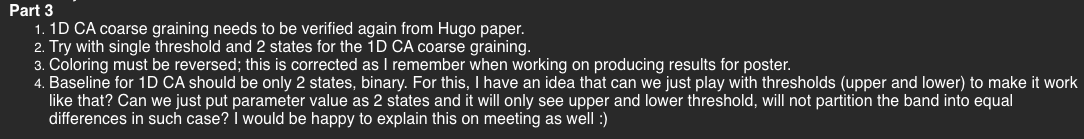

- The reason why the whole coarse graining goes white with a threshold being between 0th bar and rest of the bars, for example, with the configuration of rule 60, initial percentage 10 and threshold at 13th number slider, will show coarse graining filtered as normally and show all live pixels with FHCG working fine. However, if you move slider above, lets say at 15th number the coarse graining becomes white-out because at that position the threshold is 0.45 and FHCG now includes whitespace as majority or in other words, frequency of the whitespace is in majority and hence it is expected to have whiteout in most of the coarse grained output.